In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("C:/Users/Gabi/PycharmProjects/multimodal-emotion-recognition/augmented_data.csv")

In [11]:
print(df["Label"])
len(df["Label"])

0        neu
1        neu
2        neu
3        neu
4        fru
        ... 
11995    hap
11996    hap
11997    hap
11998    hap
11999    hap
Name: Label, Length: 12000, dtype: object


12000

In [12]:
a = df["Label"].value_counts()

<BarContainer object of 12000 artists>

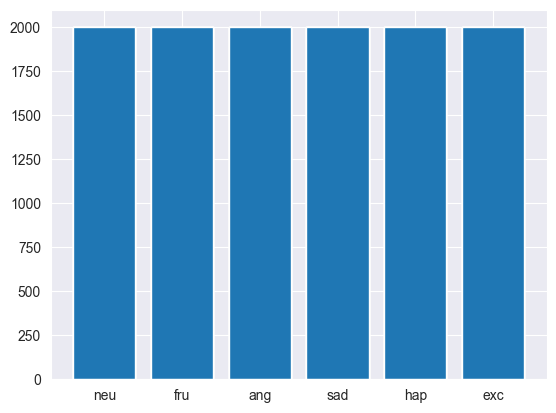

In [13]:
plt.bar(df["Label"], a[df["Label"]])

In [14]:
feats_names = ["Zero crossings", "Centroid AUC", "Rolloff AUC", "Centroid mean", "Rolloff mean", "Centroid STD", "Rolloff STD", "Centroid p-t-p value", "Rolloff p-t-p value", "Centroid_percentile", "Rolloff_percentile", "MFCC mean 1", "MFCC mean 2", "MFCC mean 3", "MFCC mean 4", "MFCC mean 5", "MFCC mean 6", "MFCC mean 7", "MFCC mean 8", "MFCC mean 9", "MFCC mean 10", "MFCC mean 11", "MFCC mean 12", "MFCC mean 13", "MFCC max_min 1", "MFCC max_min 2", "MFCC max_min 3", "MFCC max_min 4", "MFCC max_min 5", "MFCC max_min 6", "MFCC max_min 7", "MFCC max_min 8", "MFCC max_min 9", "MFCC max_min 10", "MFCC max_min 11", "MFCC max_min 12", "MFCC max_min 13", "MFCC std 1", "MFCC std 2", "MFCC std 3", "MFCC std 4", "MFCC std 5", "MFCC std 6", "MFCC std 7", "MFCC std 8", "MFCC std 9", "MFCC std 10", "MFCC std 11", "MFCC std 12", "MFCC std 13"]

In [18]:
from sklearn.preprocessing import StandardScaler

X = df.drop(["Label", "ID"], axis=1)

# Initialize MinMaxScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Combine scaled features with "Label" column
combined_data = np.hstack((X_scaled, np.array(df["Label"]).reshape(-1, 1)))

# Convert the combined data back to a DataFrame
cols = list(X.columns) + ["Label"]
df_combined = pd.DataFrame(combined_data, columns=cols)


C:\Users\Gabi\AppData\Local\Temp\ipykernel_13256\3457197029.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


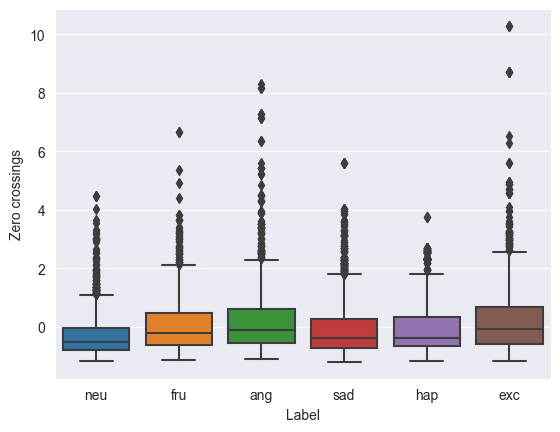

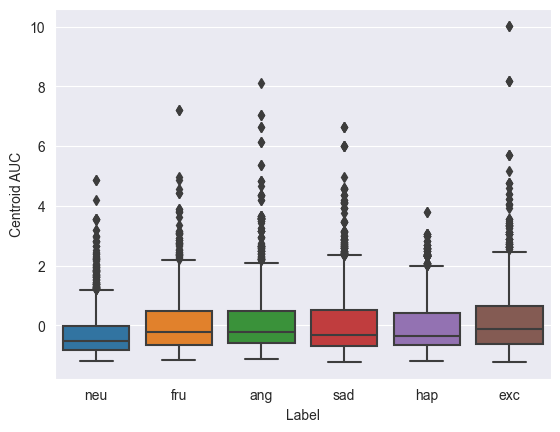

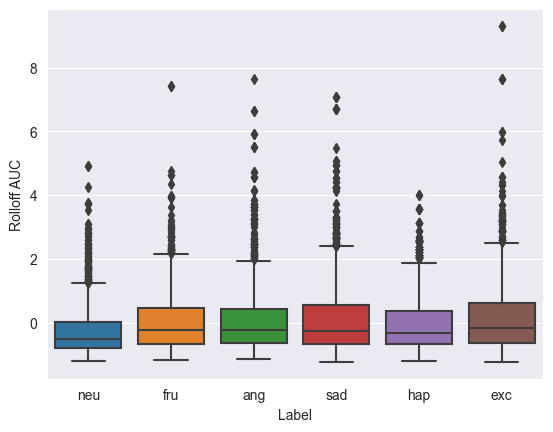

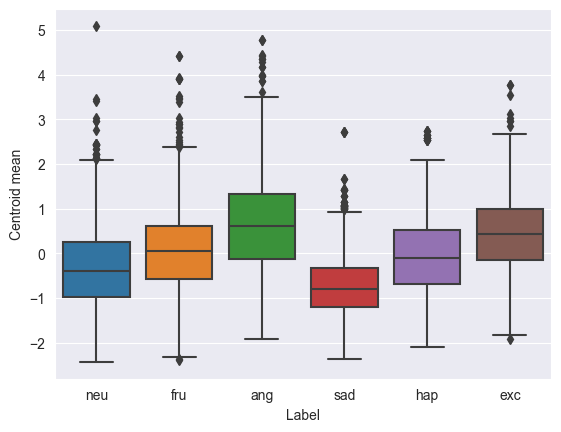

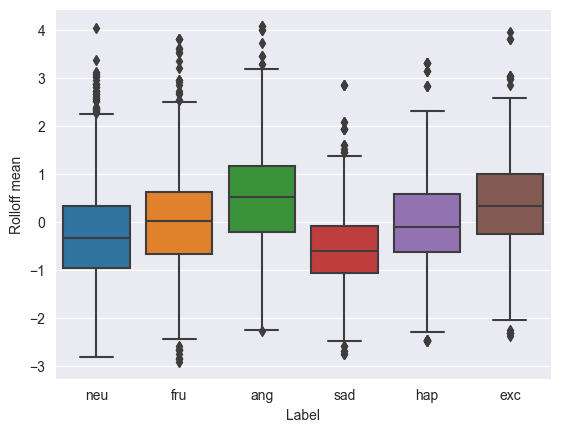

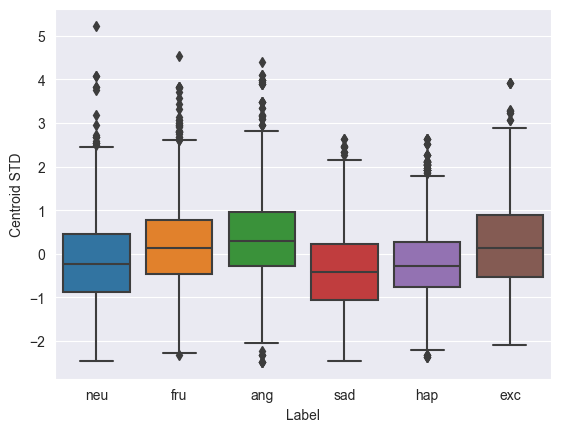

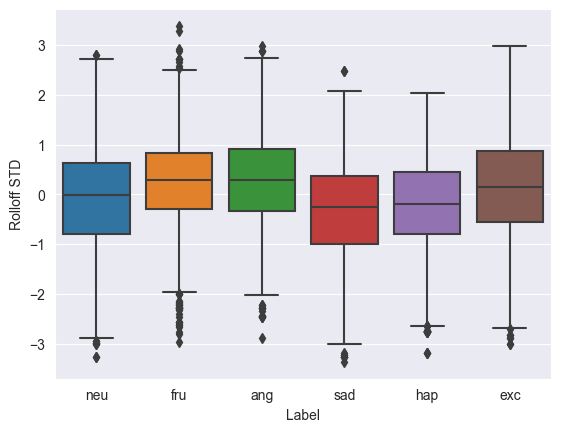

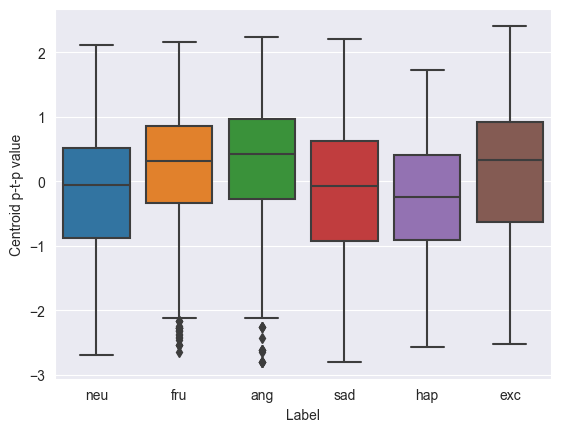

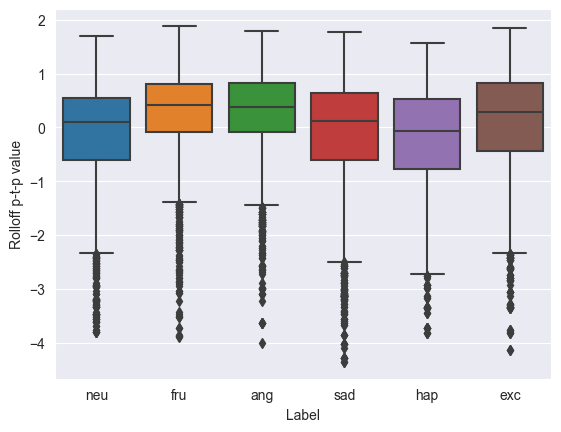

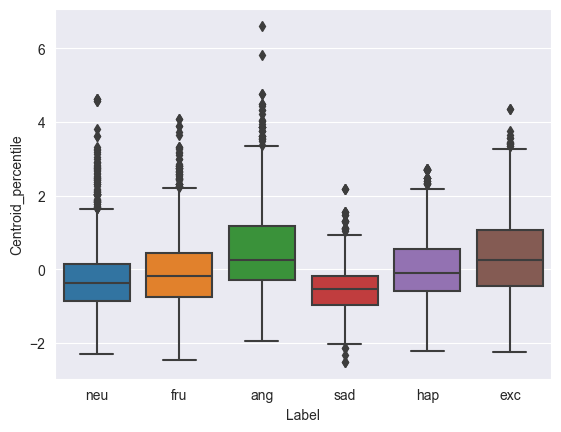

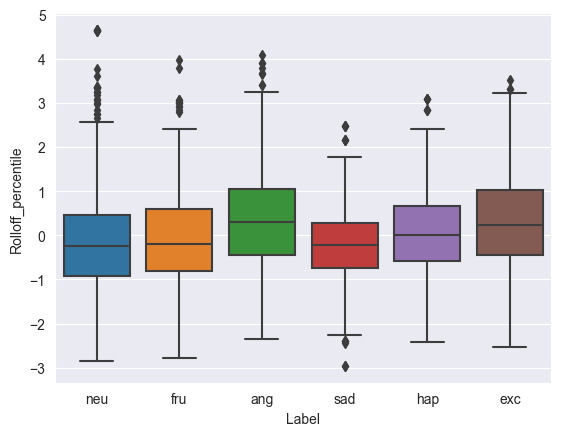

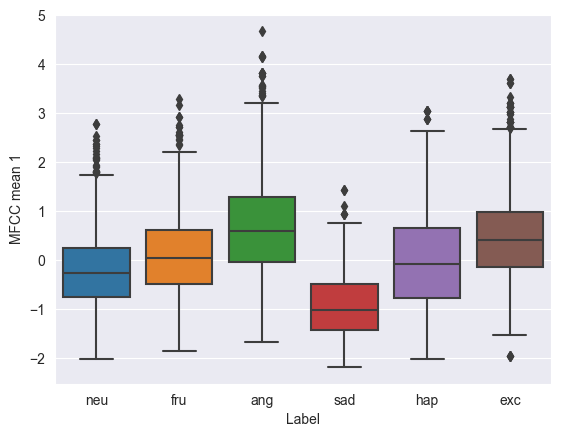

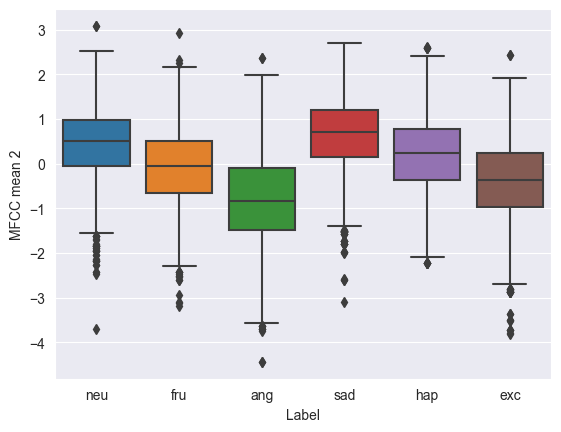

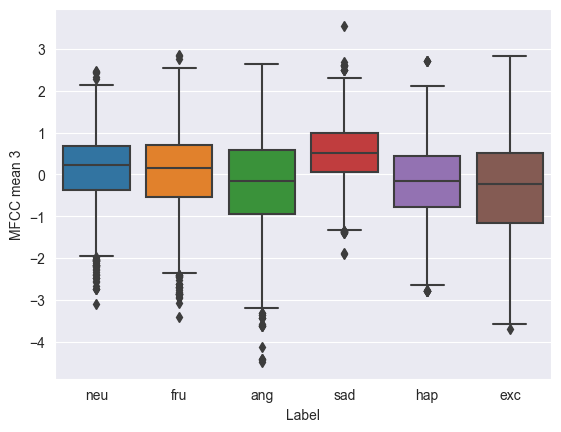

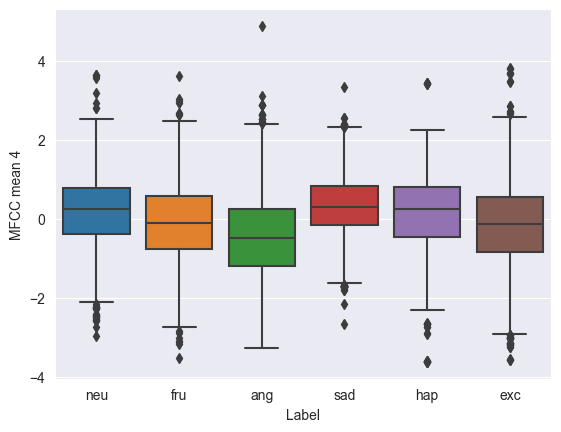

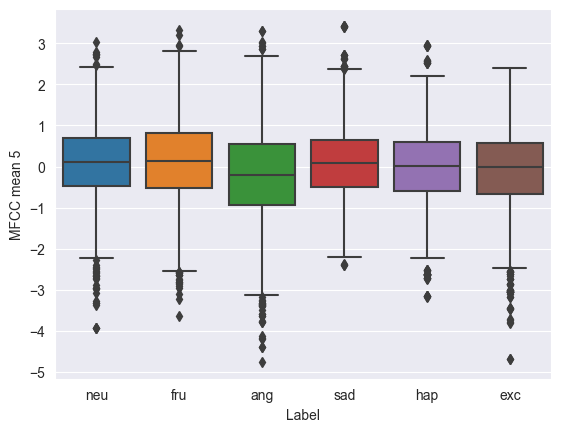

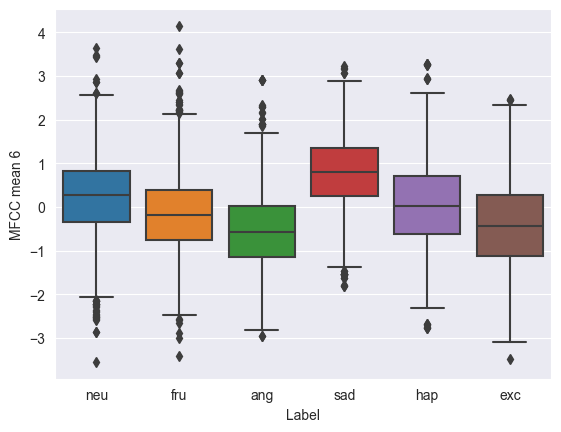

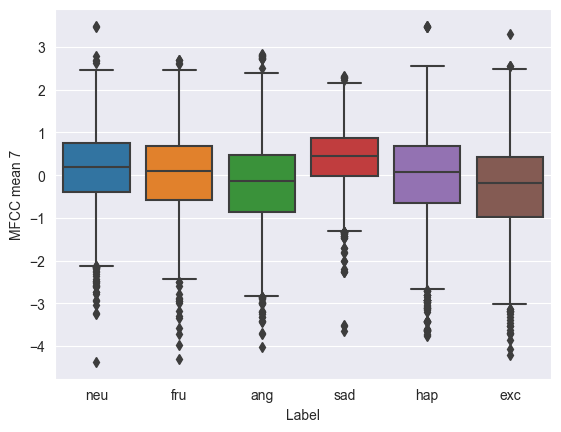

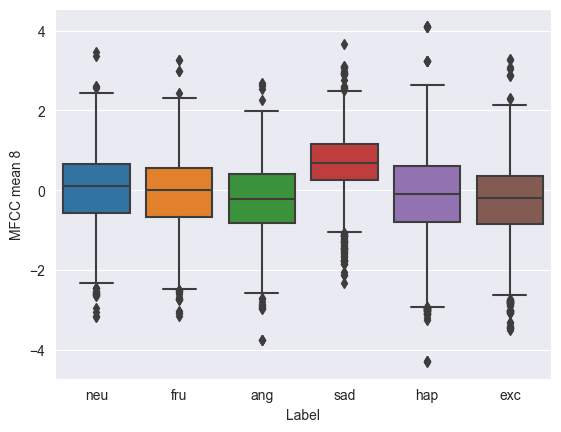

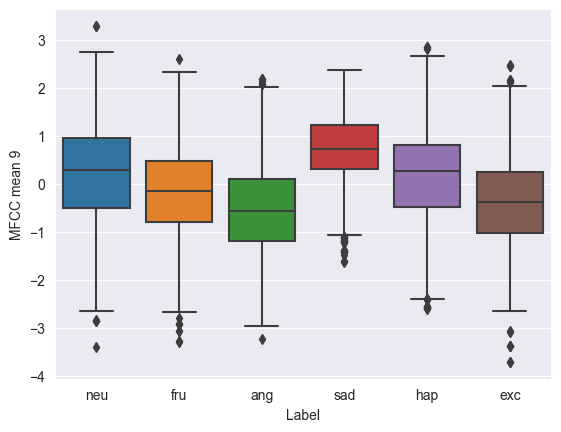

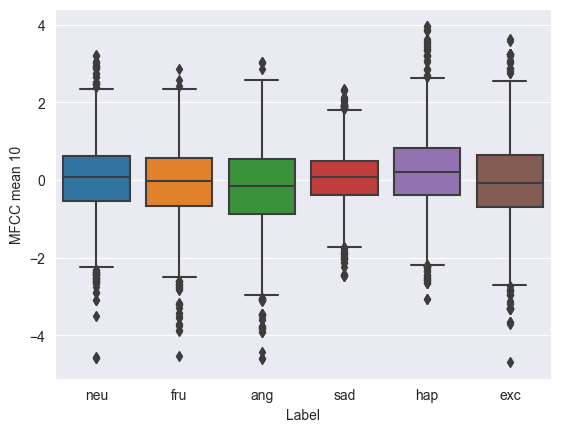

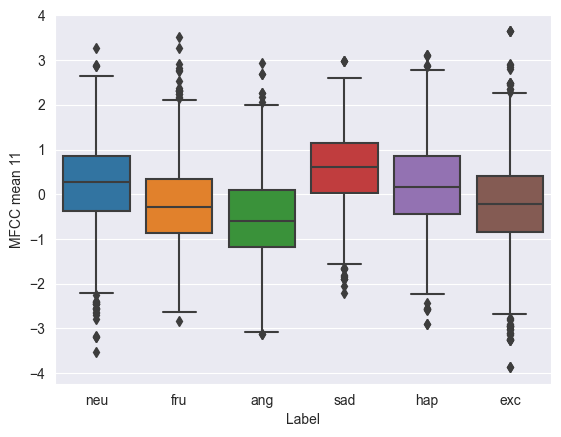

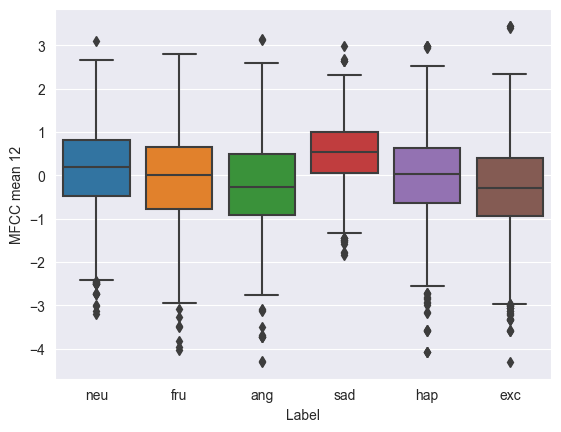

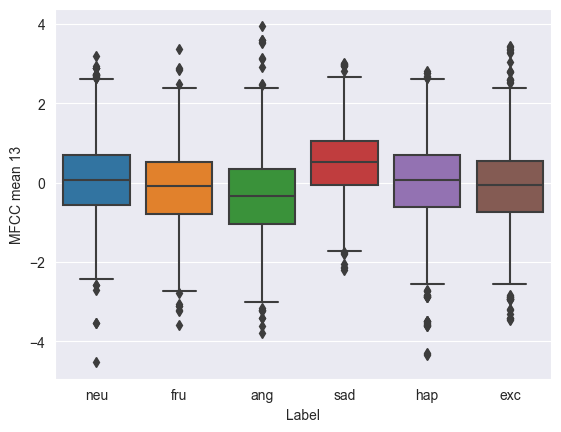

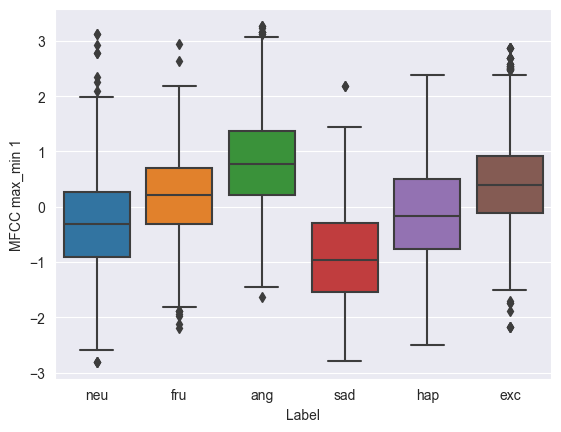

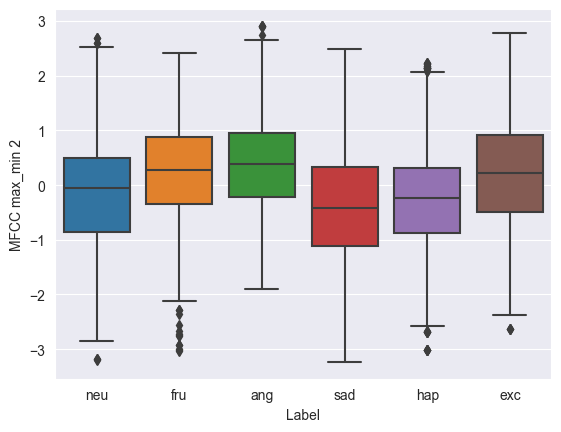

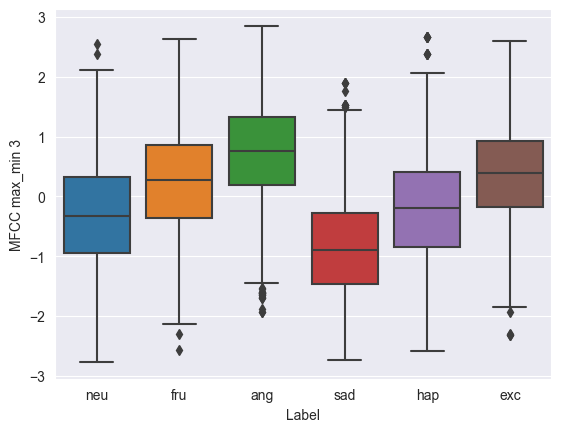

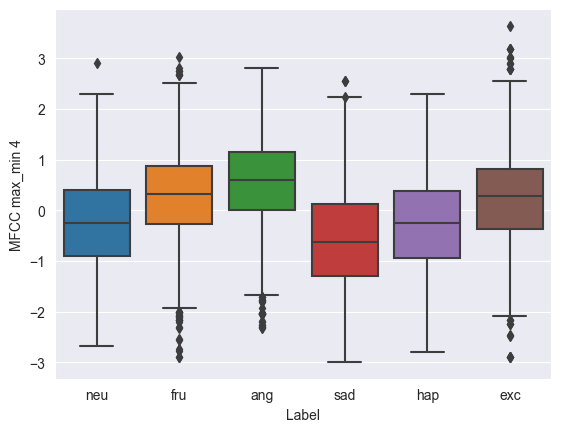

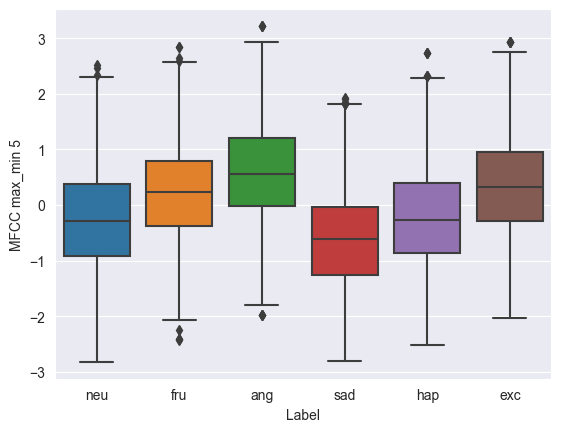

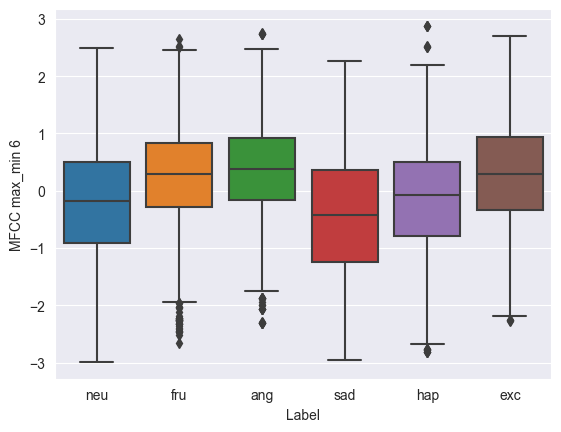

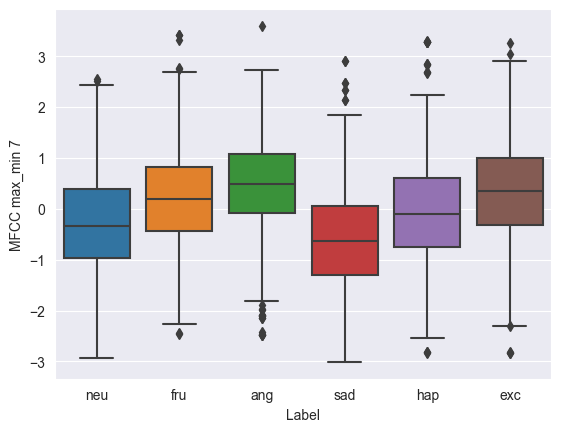

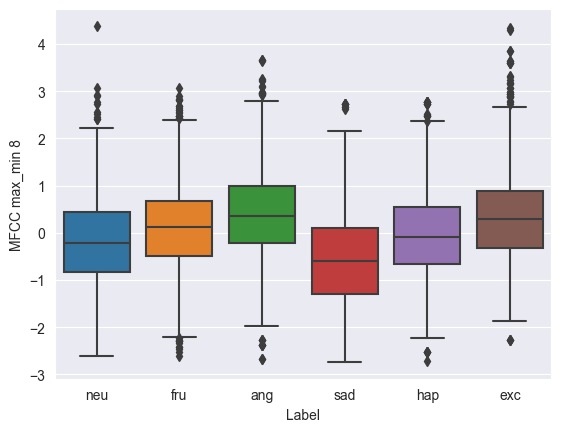

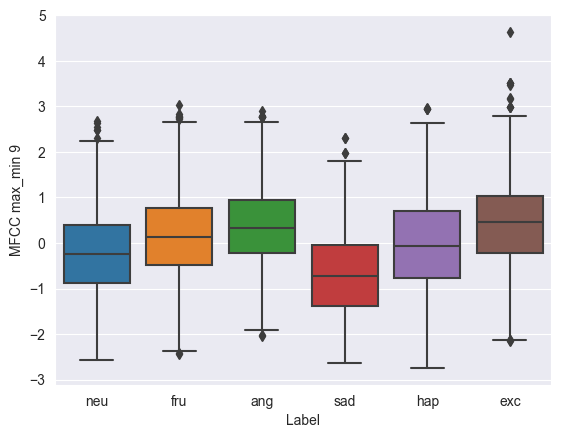

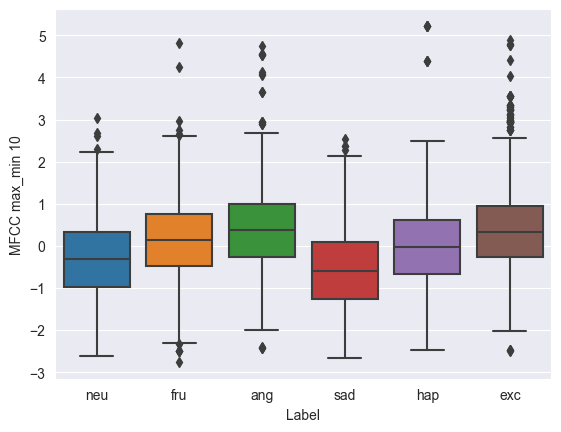

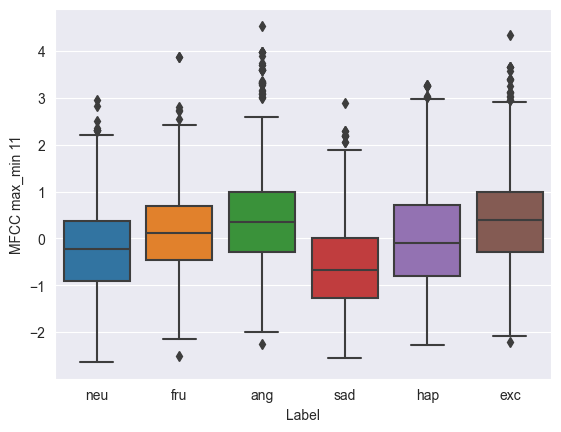

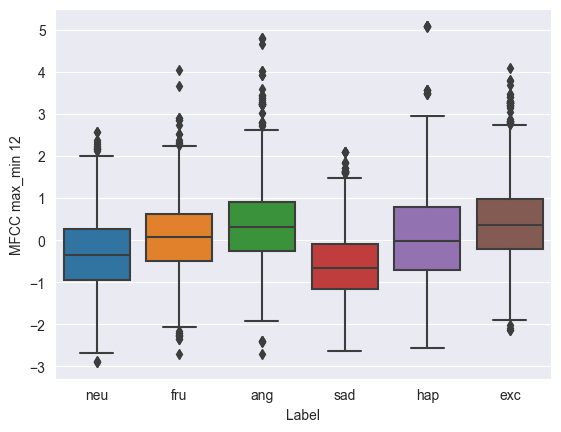

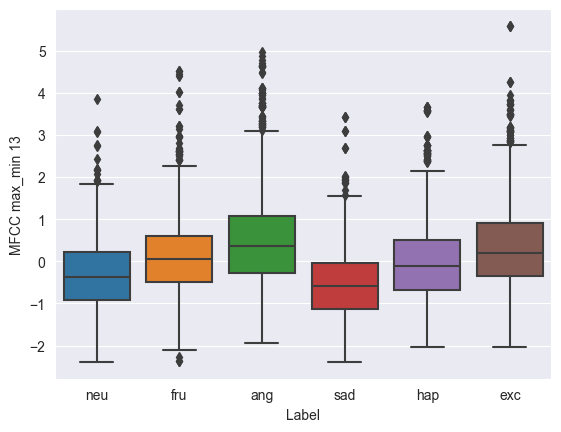

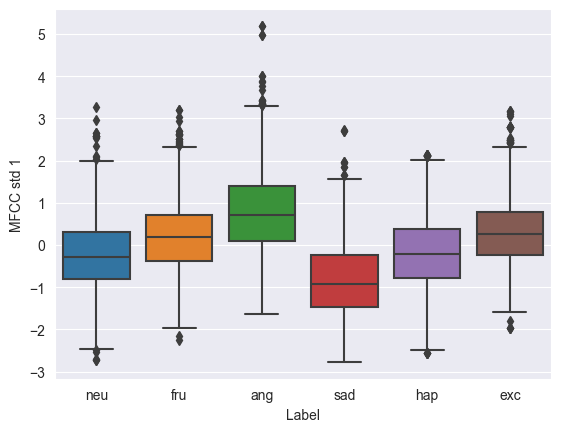

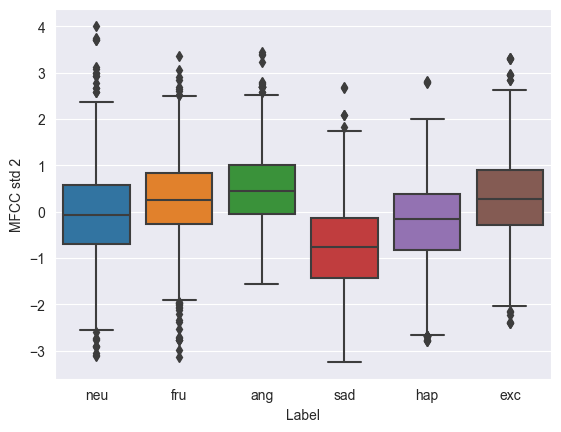

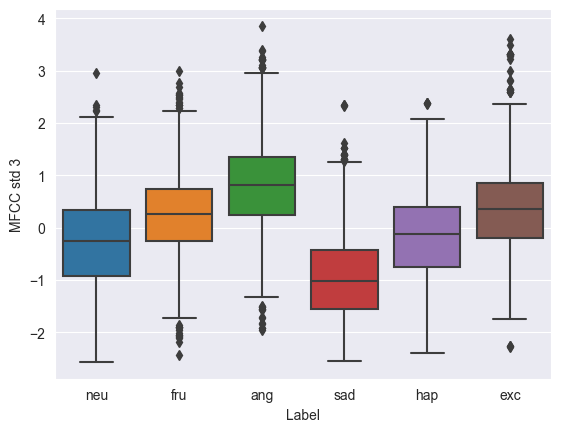

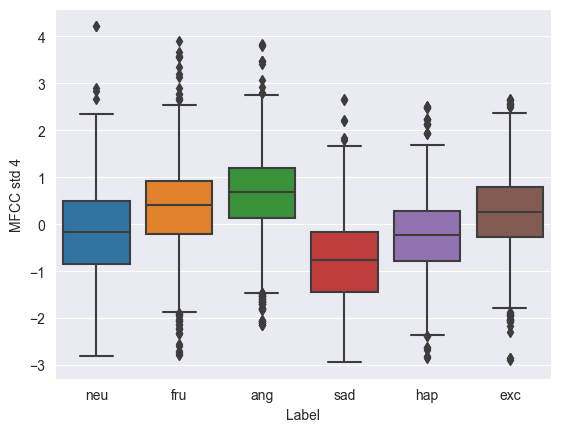

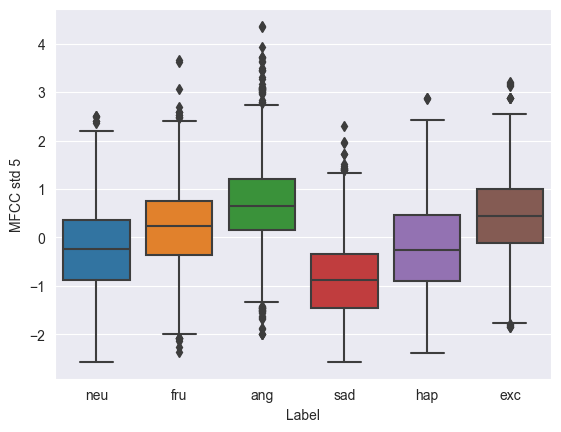

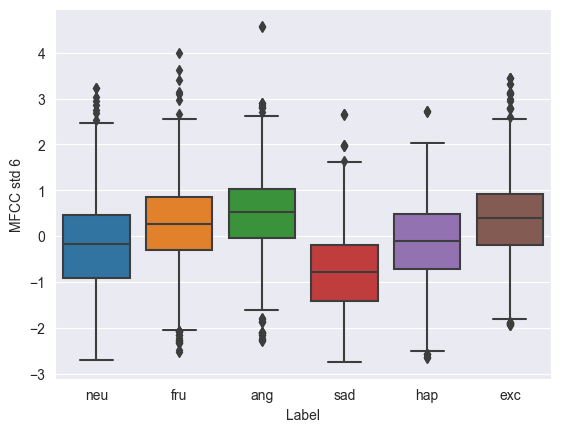

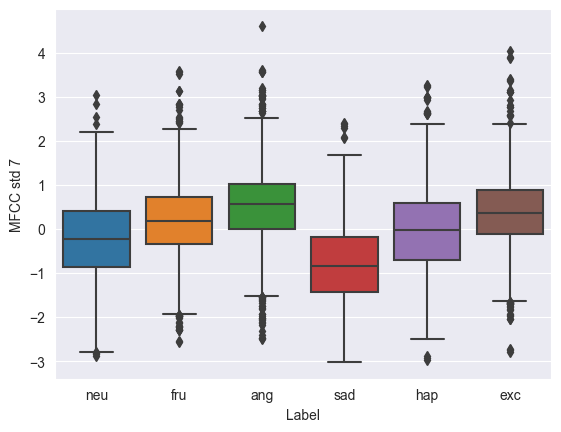

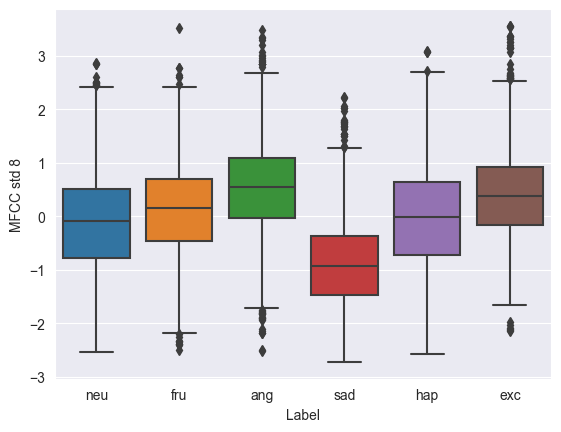

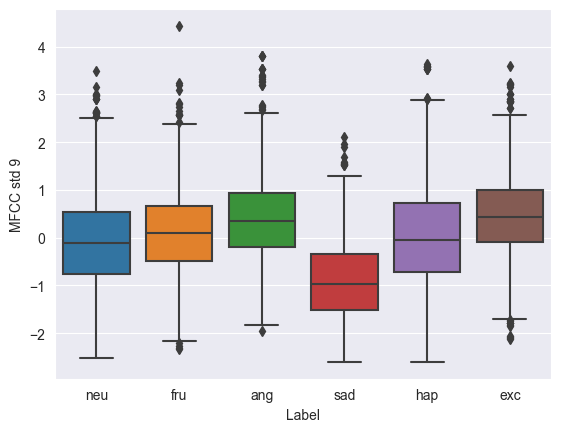

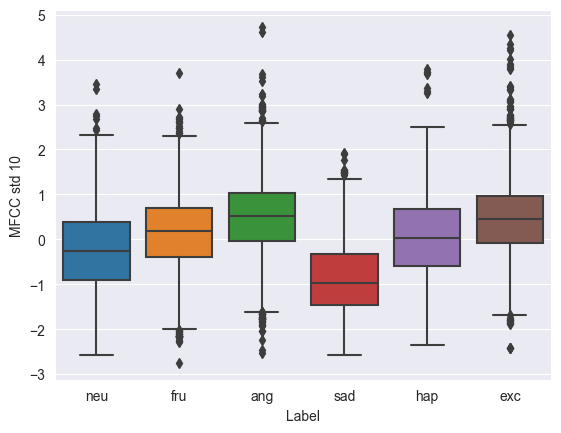

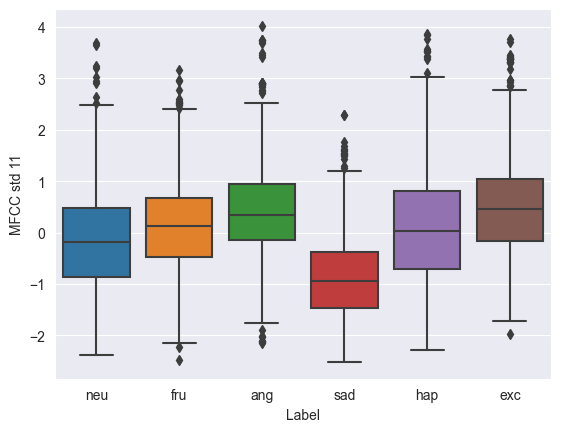

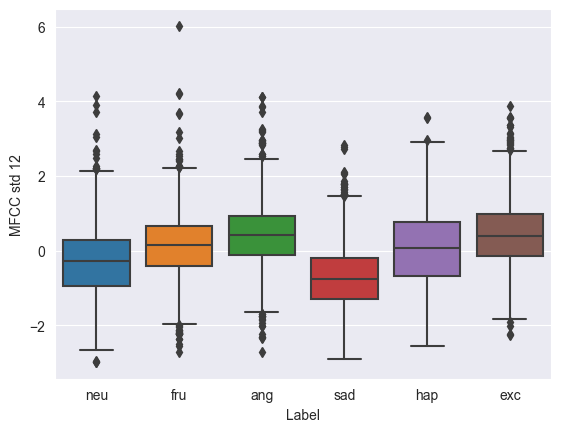

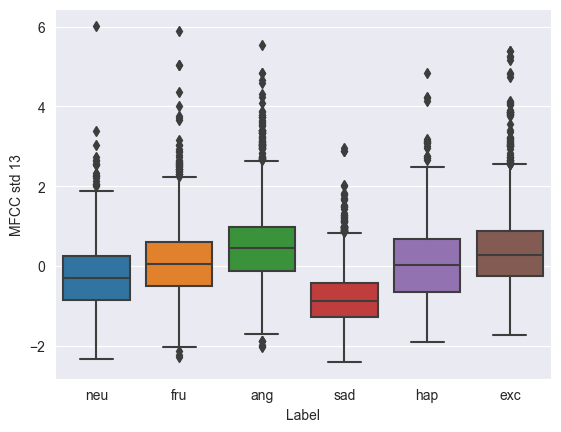

In [19]:
for feat_name in feats_names:
    plt.figure()
    sns.boxplot(x="Label", y=feat_name, data=df_combined)